In [1]:
import torch
from torch.cuda import set_device
from classifier_arch import MnistResNet
from sampling import Sample
import matplotlib.pyplot as plt
%matplotlib inline

gpu_id = 2;
cuda_avail = torch.cuda.is_available();

print("CUDA Available: ", cuda_avail);
if cuda_avail:
    print('Using gpu with id', gpu_id);
    set_device(gpu_id);
    device = torch.device("cuda:" + str(gpu_id))
else:
    print('Using CPU');
    device = torch.device("cpu");

CUDA Available:  True
Using gpu with id 2


# Synthesing from vanilla net

In [3]:
# loading vanilla net and its weights
model = MnistResNet();
if cuda_avail:
    model.cuda();
    model.load_state_dict(torch.load('MNIST_ResNet_vanilla_best.pt', map_location=lambda storage, loc: storage.cuda(gpu_id)), strict=True);
model.train(False);

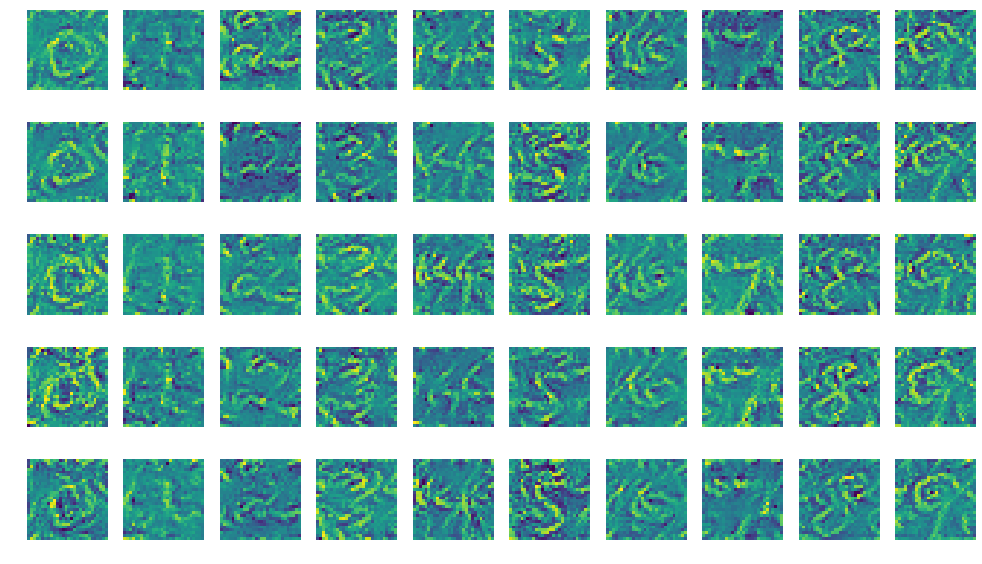

In [4]:
fig,ax = plt.subplots(nrows=5, ncols=10, figsize=(17,10));
for j in range(5):
    aug = Sample(model, num_iter=500, learning_rate=0.1, add_noise=False, init_std=0.3, early_stopping=False);
    for i in range(10):
        ax[j][i].imshow(aug[i,0,...].cpu());
        ax[j][i].axis('off');

# Synthesing from vanilla net

In [5]:
# loading vanilla net and its weights
model = MnistResNet();
if cuda_avail:
    model.cuda();
    model.load_state_dict(torch.load('MNIST_ResNet_INN_best.pt', map_location=lambda storage, loc: storage.cuda(gpu_id)), strict=True);
model.train(False);

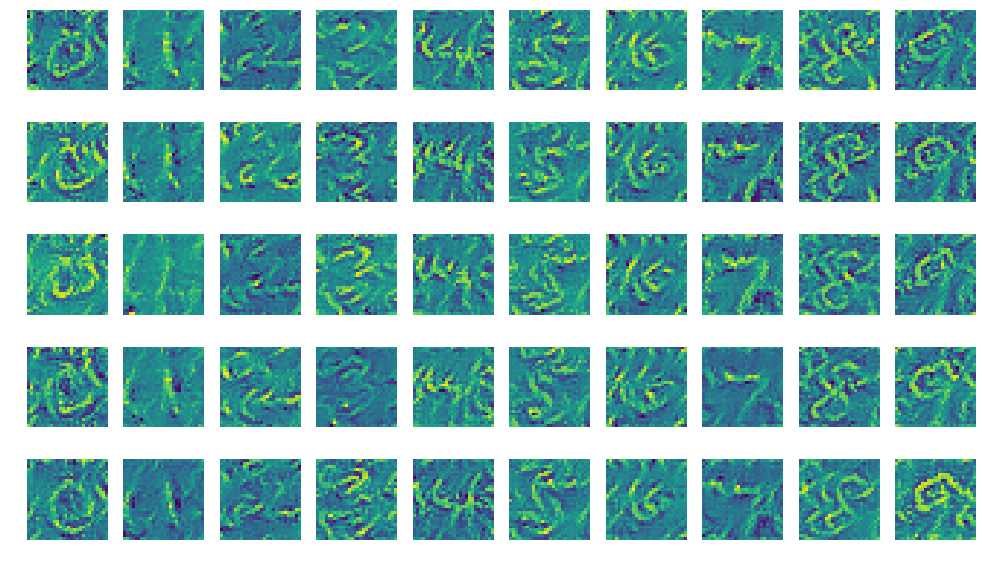

In [11]:
fig,ax = plt.subplots(nrows=5, ncols=10, figsize=(17,10));
for j in range(5):
    aug = Sample(model, num_iter=500, learning_rate=0.1, add_noise=False, init_std=0.3, early_stopping=False);
    for i in range(10):
        ax[j][i].imshow(aug[i,0,...].cpu());
        ax[j][i].axis('off');